In [ ]:

from mwasis import *  # noqa: F403



# Wprowadzenie

## Zasady


1. Upel https://upel.agh.edu.pl/enrol/instances.php?id=9386
2. Szybkie testy co zajęcia
3. punkty za wykonanie ćwiczeń
4. Kontakt: krusek@agh.edu.pl

## Upel 

\alert{mwasis25}
\qrcode{https://upel.agh.edu.pl/enrol/instances.php?id=9386}

## Część I

Jak fizyka teoretyczna

- Łańcuch Markowa
- Rozkład stacjonarny
- Parametry inżynierskie

## Część II

Jak fizyka eksperymentalna 

::: incremental
- Jak dopasować model do obserwacji ruchu w sieci?
- Jak oszacować niepewność dopasowania i wyników ?
- Co zrobić gdy model analityczny nie jest dokładny?
- Jak modelować złożone procesy w sieci?
:::

## Metody

- Estymatory
- Modele statystyczne
- Wnioskowanie Bayesowskie
- Probabilistyczne języki programowania
- Modele "black box"

## Zastosowanie

- Unikamy błędów systematycznych
- Wynik bez $\pm$ niewiele mówi (wzrost każdego to 1.8 m ? )
- Często chcemy wywnioskować coś o sieci na podstawie zaszumionych obserwacji (tomografia sieciowa)


\begin{alertblock}{Bonus}
Teoretyczne podstawy uczenia maszynowego.
\end{alertblock}

## Narzędzia

- Python + numpy i przyjaciele
- TensorFlow Probability
- Google Colab
- Inne 
  - Stan
  - pyro
  - numpyro
  - pymc3

## Literatura

- Pattern Recognition and Machine Learning,  Christopher M. Bishop, Springer New York, 2016
- Bayesian Methods for Hackers: Probabilistic Programming and Bayesian Inference, Addison-Wesley Data and Analytics – wersja online https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
- Tensorflow Probability – przykłady 
- Doing Bayesian Data Analysis: A Tutorial with R, JAGS, and Stan, John Kruschke Academic Press, 2011




## Rozkłady

### Zasada

Wszystko, co jest nieznane opisujemy zmiennymi losowymi.

### Punktowe modele probabilistyczne

- Szukamy parametrów rozkładów interesujących zmiennych.
- Parametry to liczby-punkty.

## Podstawowe modele probabilistyczne

::: incremental
- Rozkład
- Mieszanka
- Dopasowanie funkcji
:::

## Rozkłady klasyfikacja

- Nośnik
    - Dyskretne (Poisson, Bernoulli, Dwumianowy, ...)
    - Ciągłe (Wykładniczy, Normalny, Pareto, Gamma, LogNormalny,...)
- Wymiarowość
    - wielowymiarowy rozkład normalny
    - Rozkłady Hot 1

https://www.tensorflow.org/probability/api_docs/python/tfp


## Bernoulli

- $X\in\{0,1\}$
- $P(X=1)=p$, $P(X=1)=1-p$
- Parametr: $p\in<0,1>$ lub logit $\log\left(\frac{p}{1-p}\right)\in (\infty, \infty)$
- Dane binarne, dwa stany (np pakiet stracony lub nie)
- `tfp.distributions.Bernoulli`

## Kategoryczny

- Rozszerzenie Bernoulliego na $K$ klas

- $X\in\{0,1,\ldots, K-1\}$
- $P(X=i)=p_i$
- Parametry: $p_i\in<0,1>, \quad \sum_i p_i=1$ lub logit $p_i= \frac{e^{l_i}}{\sum_i e^{l_i}}, \quad l_i \in (-\infty, \infty)$
- \alert{$l_i=c + l_i$} ?
- `tfp.distributions.Categorical`

## Binomial

- Rozszerzenie Bernoulliego na $n$ losowań

- $X\in\{0,1,\ldots, n\}$
- $P(X=k) = {n \choose k} p^k (1-p)^{n-k}$ 
- Parametry: $p\in<0,1>$, lub logit $\log\left(\frac{p}{1-p}\right)\in (\infty, \infty)$ oraz $n\geq 0$ całkowite
- `tfp.distributions.Binomial`

## Poisson

- Model zliczeń (zgłoszenia, awarie itp)
- $P(X=k)=\frac{(\lambda t)^k}{k!}e^{-\lambda t}$
- Parametr $\lambda > 0$ lub $\log(\lambda)\in (-\infty, \infty)$
- `tfp.distributions.Poisson`

## Wykładniczy

- Bezpamięciowy rozkład ciągły
- $f(t)=\lambda e^{-\lambda t}$
- Parametr $\lambda > 0$ lub $\log(\lambda)\in (-\infty, \infty)$
- `tfp.distributions.Exponential`

## Beta

- Przydatny w analizie Bayesowksiej
- $f(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$, $B$ - funkcja specjalna
- Parametry $\alpha, \beta > 0$ ,$E X=\frac{\alpha}{\alpha+\beta}$
- `tfp.distributions.Beta`

## Normalny 

- Ogólny rozkład do wielu zastosowań 
- Centralne twierdzenie graniczne
- $f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$
- Parametry:
    - Średnia $\mu$ (loc)
    - odchylenie standardowe $\sigma>0$ (scale) lub $\log\sigma\in (-\infty, \infty)$
- `tfp.distributions.Normal`

## Centralne twierdzenie graniczne

### CTG

Suma $n$ niezależnych zmiennych losowych o skończonej wariancji $\sigma^2$ ma w przybliżeniu rozkład normlany dla $n\to \infty$

$${\displaystyle {\sqrt {n}}\left(\frac {X_{1}+\cdots +X_{n}}{n}-\mu \right)\ {\xrightarrow {d}}\ N\left(0,\sigma\right).}$$



### Zakres a prawdopodobieństwo 

- $\mu \pm \sigma$ 68%
- $\mu \pm 2\sigma$ 95%
- $\mu \pm 3\sigma$ 99.7%

## CTG przykład

\begin{example}
1000 użytkowników, każdy generuje średnio 500 kb/s z odchyleniem standardowym 5 Mb/s.

Jakie prawdopodobieństwo, że ruch przekroczy 1 Gb/s
\end{example}

### Rozwiązanie

- łączny ruch $X\sim Norm(1000*0.5, 5\sqrt{1000})$
- $P(X>1000)=0.0008$
- `Normal(loc=500., scale=158.).survival_function(1000)`

## CTG a składanie Poissona

- $X_i\sim Pois(\lambda)$
- $E X_i=\lambda$
- $\sigma_X=\sqrt{\lambda}$

### Superpozcja

$$\sum X_i\sim Pois(n \lambda)$$

### CTG

$$\sum X_i\sim Norm(n \lambda,\sqrt{n\lambda})$$


## Gamma

- Rozkład podobny do normalnego, ale zawsze dodatni.
- Wykładniczy to specjalny przypadek Gamma
- $f(x;\alpha ,\beta ) ={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}, \quad x >0$
- Parametry: $\alpha >0$, $\beta>0$
- `tfp.distributions.Gamma`

## Rozkład wielowymiarowy

### Wektor losowy

Wektor zmiennych losowych. \alert{Najczęściej będą zależne}

$$\mathbf{X}=(X_1,X_2,\ldots,X_d)$$



## Przykłady

- Niezależne zmienne
- Łańcuch Markowa
- kombinacja liniowa niezależnych zmiennych o rozkładzie normlanym
- ruch w bajtach i pakietach
- $d$ obserwacji procesu w czasie
- Zdjęcia !



## Wielowymiarowy rozkład normalny

- Kombinacja liniowa niezależnych zmiennych o rozkładzie normlanym
- Duże znaczenie teoretyczne
- $f(\mathbf{X})={\frac {1}{(2\pi )^{n/2}\left|\Sigma \right|^{1/2}}}\exp \left(-{\frac {1}{2}}(X-{\boldsymbol {\mu }})^{T}\Sigma ^{-1}(X-{\boldsymbol {\mu }})\right).$
- Parametry
    - Wektor średnich $\boldsymbol {\mu }$
    - macierz kowariancji $\Sigma$
- `tfp.distributions.MultivariateNormal*`



## Dwuwymiarowy rozkład normalny

<!-- ![](mvn.svg) -->


In [ ]:
mux = 100.0  # @param
muy = 20.0  # @param
sigmax = 2.0  # @param
sigmay = 3.0  # @param
rho = 0.71  # @param {type: "slider", min:-1, max:1, step:0.01}

mu = [mux, muy]
sigma = [sigmax, sigmay]
Sigma = np.diag(sigma) ** 2 + rho * np.prod(sigma) * np.rot90(np.diag(np.ones_like(mu)))

mvn = tfp.distributions.MultivariateNormalTriL(
    loc=mu, scale_tril=tf.linalg.cholesky(Sigma)
)

sample = pd.DataFrame(np.asarray(mvn.sample(200, seed=4)), columns=["X", "Y"])

g = sns.pairplot(sample)
g.figure.suptitle(
    r"mvn: $\mu=${}, $\sigma$={}, $\rho$={}".format(np.array(mu), np.array(sigma), rho)
)
plt.tight_layout()
plt.show()


## one hot

- Bernoulli: $1:[0,1]$, $0:[1,0]$
- Kategoryczny: $k:[0,0,1,\ldots,0]$

## Mieszanki

- Tworzenie nowych rozkładów poprzez łączenie innych
- Rozkład kategoryczny $Z$ o $K$ poziomach
- $K$ dowolnych rozkładów 
- $f(x)=p_1 f_1(x) + p_2f_2(x)+\ldots +p_Kf_K(x)$
- Parametry: Parametry $Z$ + parametry każdej składowej 
- `tfp.distributions.Mixture`

### Schemat losowania

1. Losujemy komponent
1. Losujemy liczbę ze zmiennej odpowiadającej wylosowanemu komponentowi



## Mieszanki Przykład

<!-- ![](mix.svg) -->


In [ ]:
p = 0.7

tfd = tfp.distributions

cat = tfd.Categorical(probs=[p, 1 - p])
comps = [tfd.Normal(loc=1., scale=1.), tfd.Normal(loc=5., scale=1.), ]

mix = tfd.Mixture(cat=cat, components=comps)

s = mix.sample(1000, seed=3)

g = sns.histplot(s, kde=True)


##  Bijekcje zmiennych losowych

- $Y=g(X)$

$$f_Y(y)=f_x(g^{-1}(y))\left|\frac{d }{d y}g^{-1}(y)\right|$$

- `tfp.distributions.TransformedDistribution`
- `tfp.bijectors`

## Relacje między rozkładami

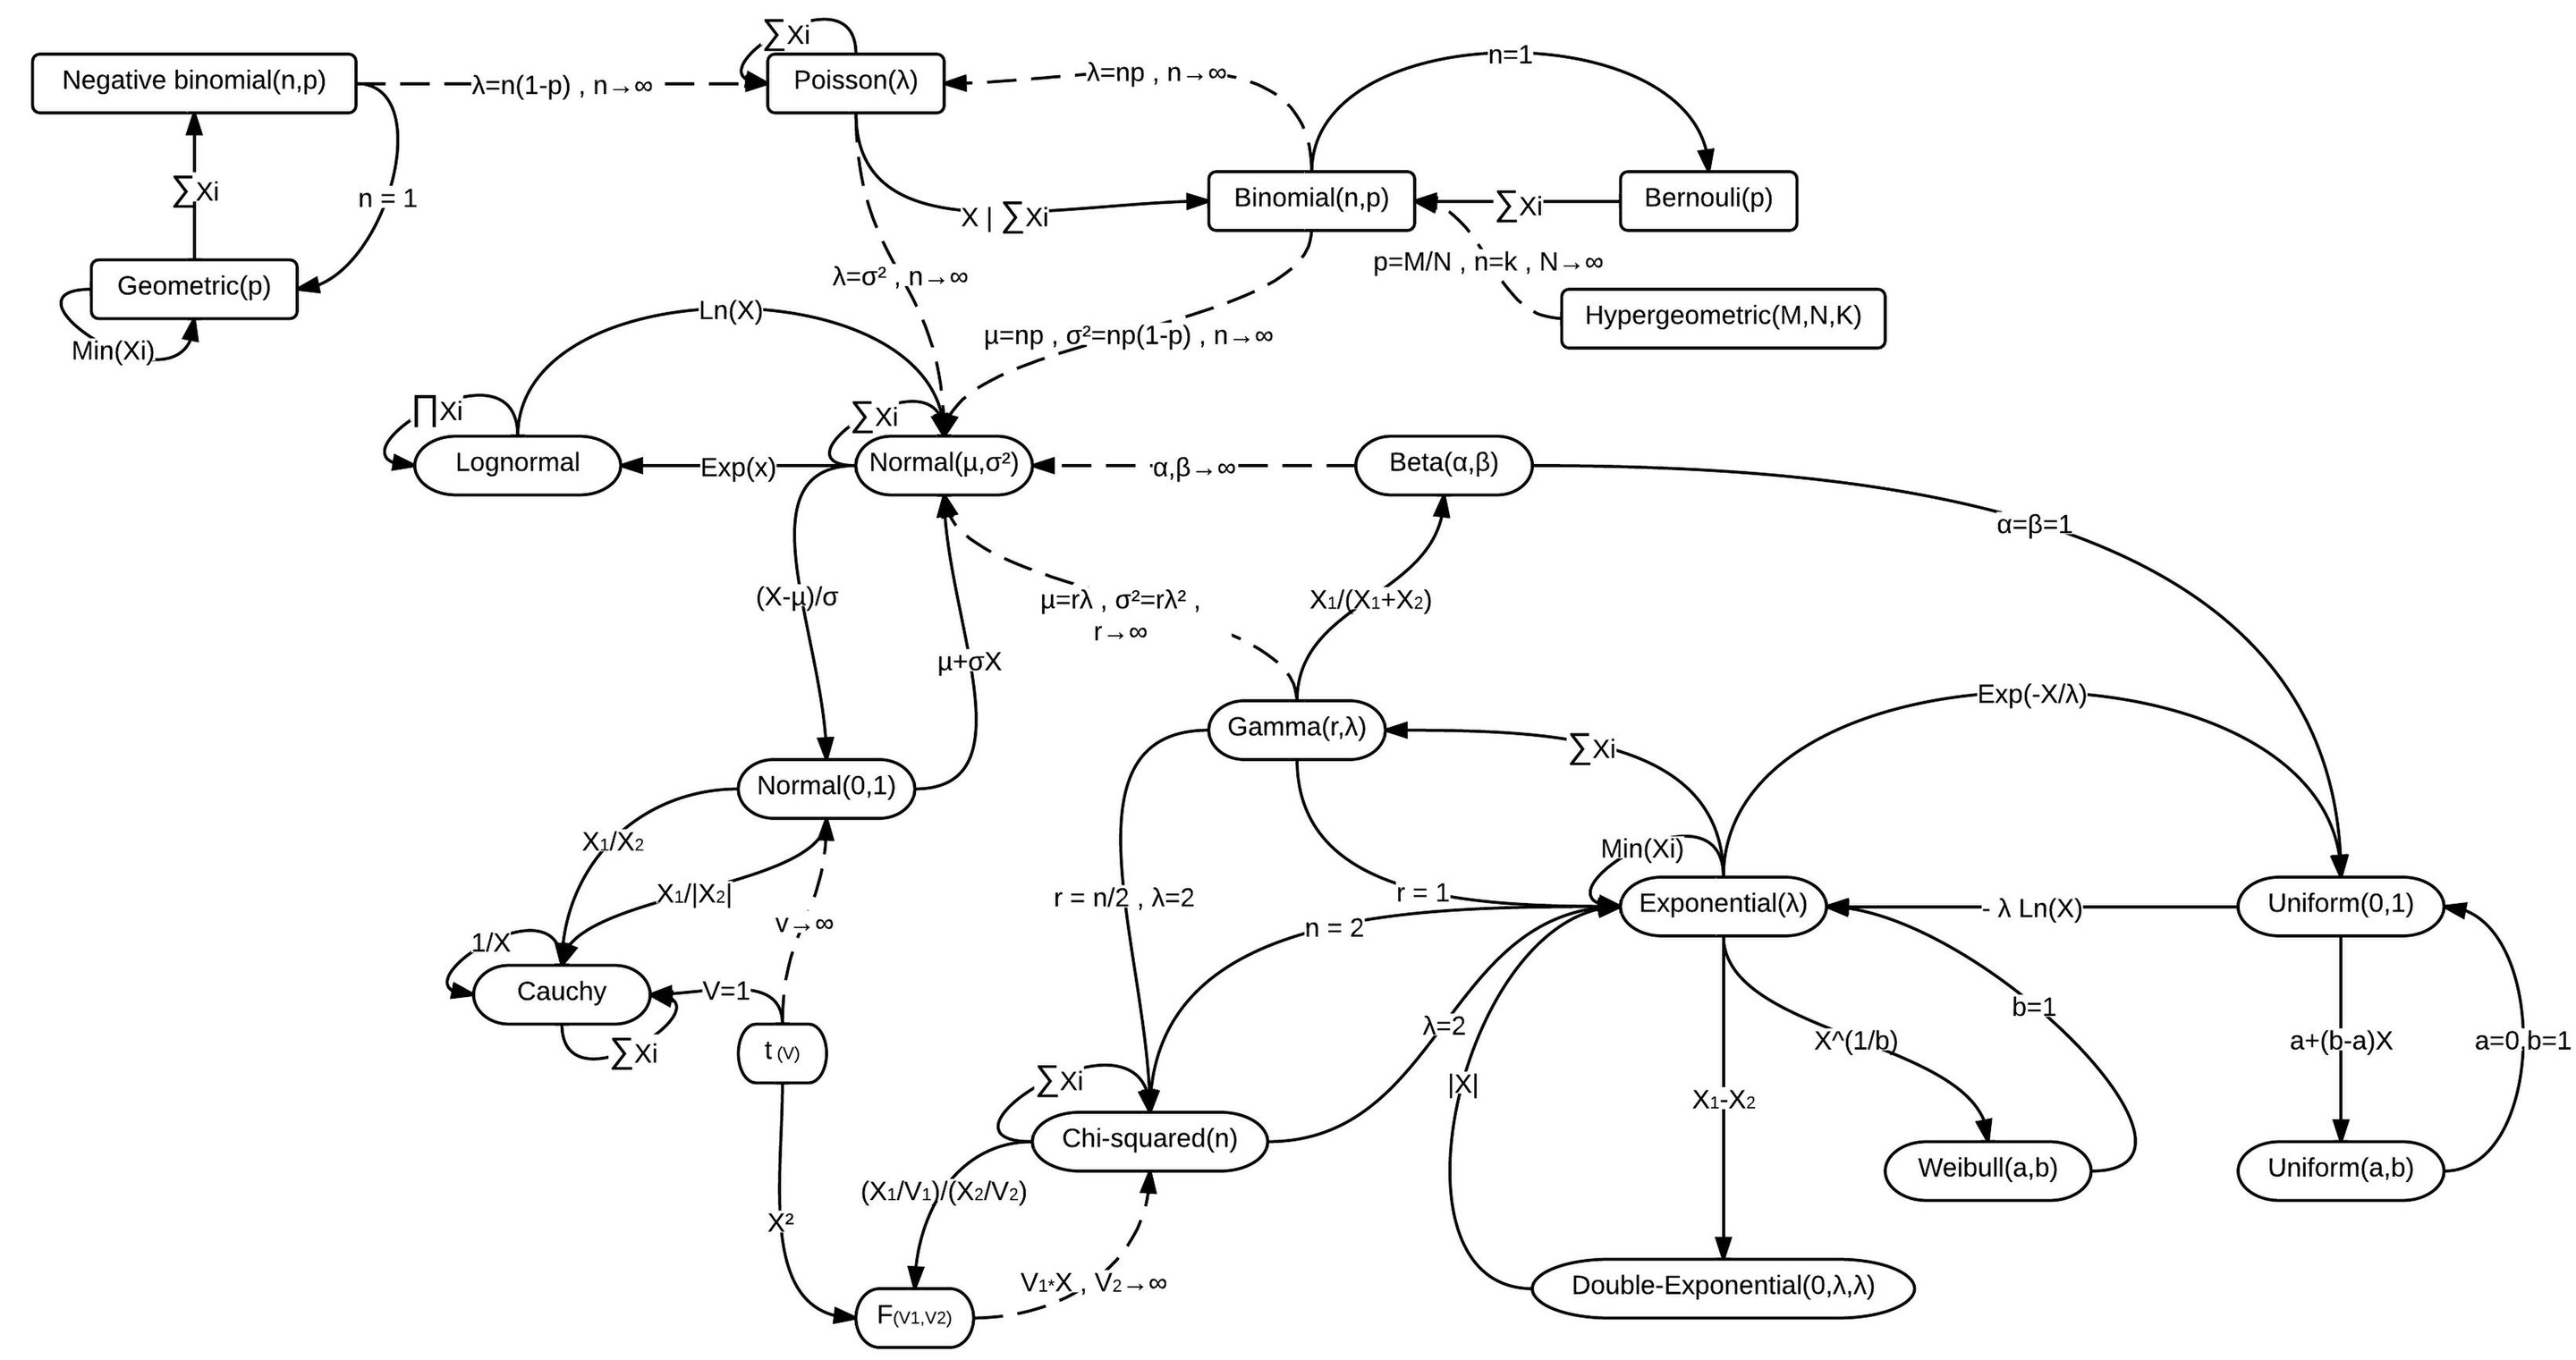

## Estymator jądrowy

Nieparametryczny estymator gęstości

- Wygładza rozkład

$$
\hat{f}(x)=\frac{1}{n h}\sum_{i=1}^{n}K\left(\frac{x-x_i}{h}\right)
$$

 - $K$ - jądro, często znana pdf
 - $h$ - pasmo parametr
 - $n$ - liczność próbki
 - $d$ - liczba wymiarów

### Reguła Scotta ($d$ wymiarów)

$$h\simeq\hat\sigma n^{-\frac{1}{d+4}}$$

## Estymator jądrowy


In [ ]:
n = 2000

tfd = tfp.distributions
norm = tfd.Normal(loc=1., scale=1.)
s = norm.sample(n, seed=4)
fig, ax = plt.subplots()
g = sns.histplot(s, label='kde', stat='density', kde=True, ax=ax)
lim = plt.xlim()
x = np.linspace(*lim, 200)
y = norm.prob(x)
sns.lineplot(x=x, y=y, label='Normalny', color='orange', ax=ax)
plt.legend();


## Podsumowanie

- Nieznane wielkości opisujemy zmiennymi losowymi
- Typ rozkładu zależy od danych
- Model punktowy estymuje parametry rozkładu zmiennych
<!-- - Dopasowanie krzywych to estymacja rozkładu wielowymiarowego -->



# {.standout}

Pytania